In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, spearmanr

## Exploratory Data Analysis


The goal of this file is to understand how accurate some metrics are at representing reality. 


### 1. Points? Value? What is success

In [26]:
transfermarkt_data = pd.read_csv("/Users/apendela10/STAT482/statistics-capstone/results/transfermarkt_data_normalized.csv")

#ignore 2025 data as it is incomplete
transfermarkt_data = transfermarkt_data[transfermarkt_data["Year"] != 2025]

transfermarkt_data

,Team,Squad_Size,Average_Age,Number_of_Foreigners,Average_Market_Value,Total_Market_Value,Position,Goal_Difference,Points,Year,normalized_total_market_value
0,chelsea fc,31,24.9,24,10.69,331.48,1,57,95,2004,1.000000
1,manchester united,37,24.7,25,7.93,293.23,3,32,77,2004,0.884608
2,arsenal fc,37,23.9,29,6.68,247.00,2,51,83,2004,0.745143
3,liverpool fc,38,25.3,26,5.85,222.13,5,11,58,2004,0.670116
4,tottenham hotspur,38,25.3,22,3.41,129.45,9,6,52,2004,0.390521
...,...,...,...,...,...,...,...,...,...,...,...
415,everton fc,39,25.8,21,9.31,363.23,13,-2,48,2024,0.267081
416,fulham fc,28,27.7,21,12.94,362.35,11,0,54,2024,0.266434
417,southampton fc,42,25.3,23,7.38,310.05,20,-60,12,2024,0.227978
418,ipswich town,35,26.6,17,7.72,270.10,19,-46,22,2024,0.198603


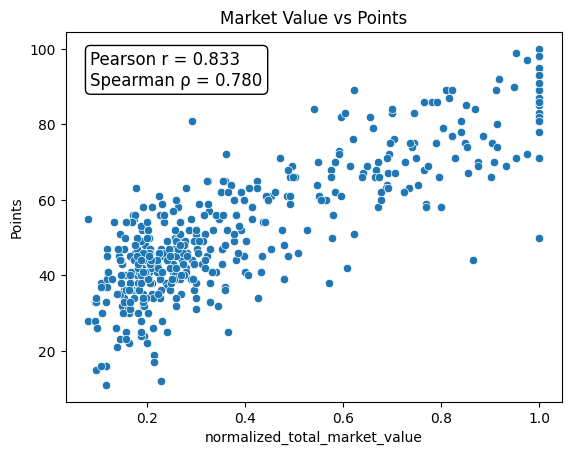

In [32]:
x = transfermarkt_data["normalized_total_market_value"]
y = transfermarkt_data["Points"]

# Pearson correlation (linear relationship)
pearson_corr, pearson_p = pearsonr(x, y)

# Spearman correlation (rank-based, good for ordered variables like Points)
spearman_corr, spearman_p = spearmanr(x, y)

# Scatter plot
sns.scatterplot(data=transfermarkt_data, x="normalized_total_market_value", y="Points")

plt.title("Market Value vs Points")

# Annotate correlations
plt.text(
    0.05, 0.95,
    f"Pearson r = {pearson_corr:.3f}\nSpearman ρ = {spearman_corr:.3f}",
    transform=plt.gca().transAxes,
    ha="left", va="top", fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
)

plt.show()

<AxesSubplot: xlabel='Points', ylabel='Position'>

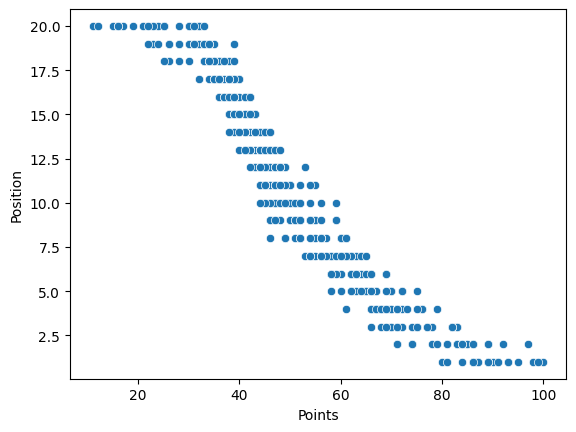

In [28]:
sns.scatterplot(data=transfermarkt_data, x="Points", y="Position")


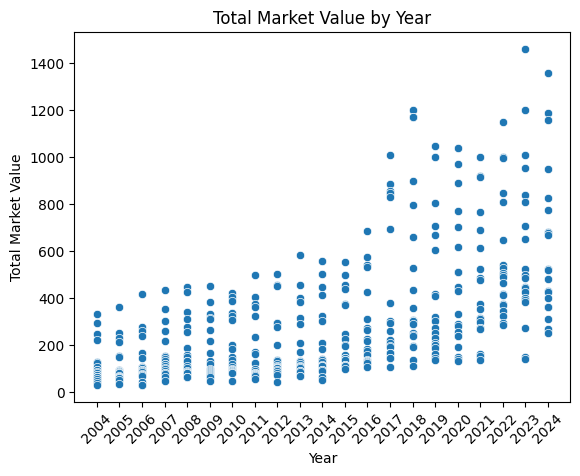

In [34]:
sns.scatterplot(data=transfermarkt_data, x="Year", y="Total_Market_Value")

# Force x-axis ticks to show every year
plt.xticks(range(2004, 2025), rotation=45)  

plt.xlabel("Year")
plt.ylabel("Total Market Value")
plt.title("Total Market Value by Year")
plt.show()

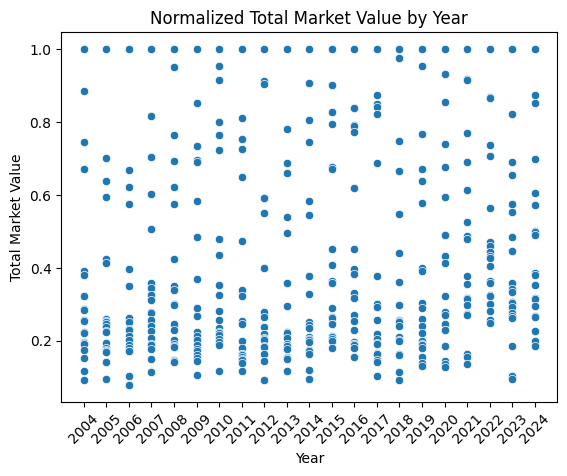

In [36]:
sns.scatterplot(data=transfermarkt_data, x="Year", y="normalized_total_market_value")

# Force x-axis ticks to show every year
plt.xticks(range(2004, 2025), rotation=45)  

plt.xlabel("Year")
plt.ylabel("Total Market Value")
plt.title("Normalized Total Market Value by Year")
plt.show()